## About the Dataset
This dataset contains information about the credit landscape (credit loan provided to customers) of a large Singapore bank.
### Goal
The goal of this dataset is to predict whether the customer will default or not in the credit payment (credit loan payment).
### Features
The dataset includes the following features:
1. **checking_balance:** The amount of balance in SGD present in the current loan account /loan bank account of the customer who has taken the credit loan.
2. **months_loan_duration:** The duration of the loan in months, which ranges from 4 months to 6 years.
3. **credit_history:** The current credit history of the customer, ranging from critical to perfect (5 different values).
4. **purpose:** The purpose for which the loan was taken.
5. **amount:** The amount for which the credit loan was taken.
6. **savings_balance:** The amount of balance in SGD present in the savings bank account of the customer who has taken the credit loan.
7. **employment_duration:** The duration in years for which the customer has been in employment anywhere.
8. **percent_of_income:** This shows what % of the annual income of the customer is this loan amount.
9. **years_at_residence:** The number of years the customer has stayed in this location.
10. **age:** The age of the customer who has taken the credit loan.
11. **other_credit:** Any other credit that the customer has, apart from this credit loan.
12. **housing:** The type of residence that the customer possesses.
13. **existing_loans_count:** The total number of active loans that the customer has.
14. **job:** The type of job that the customer does.
15. **dependents:** The number of dependent family members for the customer.
16. **phone:** Does the customer have a phone or has updated the same in the records. "Yes" means he has a phone and has updated the same with the bank. "No" could mean either the customer does not have a phone, or he is yet to update the same with the bank.
### Target Variable
The target variable in this dataset is labeled as **default**. The values "no" and "yes" refer to whether someone will default or not in the credit card payment.

``The Model should have high Recall value because if a person is actually a default and model predicted him as not default then bank may suffer from finincial loss. So, the False negative is the most dangerous case for our model``
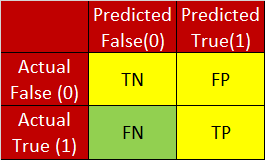

## Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
%matplotlib inline
pd.set_option('display.max_columns',None)

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
import xgboost as xgb

In [92]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

In [93]:
from tqdm import tqdm_notebook

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
import joblib

## Importing and Reading Data

In [95]:
df = pd.read_csv('Raw_Data_Singapore Credit Dataset.csv')

In [96]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## EDA

### Checking for unique values for each feature

In [98]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [99]:
def unique_values(df,columns):
    return np.unique(df[columns])

In [223]:
count = 0
for i in df.columns:
    if df[i].dtypes == 'O':
        print('Feature:-',i,':')
        print(unique_values(df,i))
        count +=1
print('Number of Categorical features:',count)

Feature:- checking_balance :
['1 - 200 SGD' '< 0 SGD' '> 200 SGD' 'unknown']
Feature:- credit_history :
['critical' 'good' 'perfect' 'poor' 'very good']
Feature:- purpose :
['business' 'car' 'education' 'furniture/appliances' 'renovations']
Feature:- savings_balance :
['100 - 500 SGD' '500 - 1000 SGD' '< 100 SGD' '> 1000 SGD' 'unknown']
Feature:- employment_duration :
['1 - 4 years' '4 - 7 years' '< 1 year' '> 7 years' 'unemployed']
Feature:- other_credit :
['bank' 'none' 'store']
Feature:- housing :
['other' 'own' 'rent']
Feature:- job :
['management' 'skilled' 'unemployed' 'unskilled']
Feature:- phone :
[0 1]
Feature:- default :
[0 1]
Number of Categorical features: 10


In [101]:
count = 0
for i in df.columns:
    if df[i].dtypes == 'int64':
        print('Feature:-',i,':')
        print(unique_values(df,i))
        count +=1
print('Number of Numerical features:',count)

Feature:- months_loan_duration :
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 26 27 28 30 33 36
 39 40 42 45 47 48 54 60 72]
Feature:- amount :
[  250   276   338   339   343   362   368   385   392   409   426   428
   433   448   454   458   484   518   522   571   585   590   601   609
   618   625   626   629   639   640   652   654   660   662   666   672
   674   682   683   684   685   691   697   700   701   707   708   709
   717   719   727   730   731   741   745   750   753   754   759   760
   763   766   776   781   783   790   795   797   802   804   806   836
   841   846   860   866   874   882   884   886   888   894   900   902
   907   909   915   918   926   929   930   931   932   936   937   939
   947   950   951   958   959   960   975   976   983   996   999  1007
  1024  1028  1037  1038  1042  1047  1048  1049  1050  1053  1055  1056
  1068  1076  1082  1092  1098  1101  1103  1107  1108  1113  1123  1126
  1131  1136  1138  1149  1154  1155  1158 

#### Merging car0 and car with same value car 

In [102]:
df['purpose'] = np.where(df['purpose']=='car0','car',df['purpose'])

#### Replacing Binary Class with 0 and 1

In [103]:
df['phone'] = np.where(df['phone']=='no',0,df['phone'])
df['phone'] = np.where(df['phone']=='yes',1,df['phone'])

In [104]:
df['default'] = np.where(df['default']=='no',0,df['default'])
df['default'] = np.where(df['default']=='yes',1,df['default'])

In [105]:
df.sample(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
828,< 0 SGD,36,good,car,8335,unknown,> 7 years,3,4,47,none,other,1,skilled,1,0,1
350,unknown,9,good,furniture/appliances,1236,< 100 SGD,< 1 year,1,4,23,none,rent,1,skilled,1,1,0
837,unknown,4,good,furniture/appliances,601,< 100 SGD,< 1 year,1,3,23,none,rent,1,unskilled,2,0,0
453,unknown,24,good,car,2670,< 100 SGD,> 7 years,4,4,35,none,own,1,management,1,1,0
697,unknown,12,critical,car,926,< 100 SGD,unemployed,1,2,38,none,own,1,unemployed,1,0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [107]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Checking for if dataset is balanced or not 

In [108]:
df.value_counts(df.default)

default
0    700
1    300
dtype: int64

Dataset is not balanced

### Univariate Analysis

#### Plotting distribution of each variable using histograms

In [109]:
def distribution(df,columns):
    sns.set(rc = {'figure.figsize':(4,4)})
    sns.histplot(df[columns], bins=50,kde=True)
    title = 'Distribution for '+str(columns)
    plt.show()

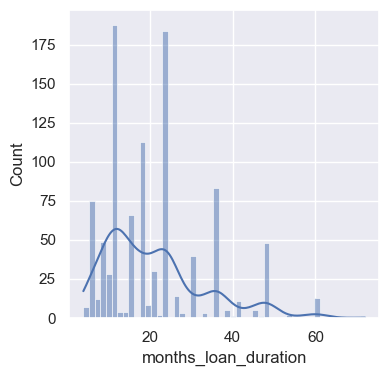

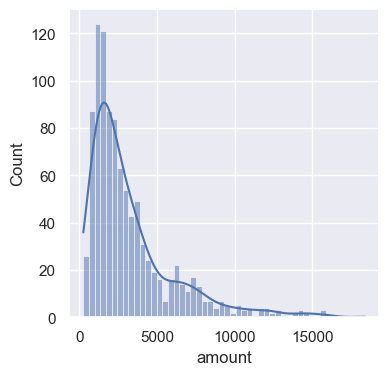

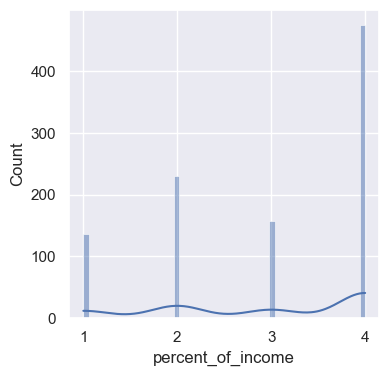

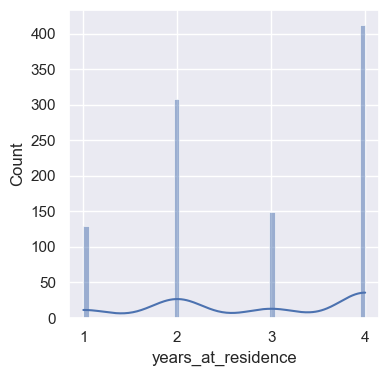

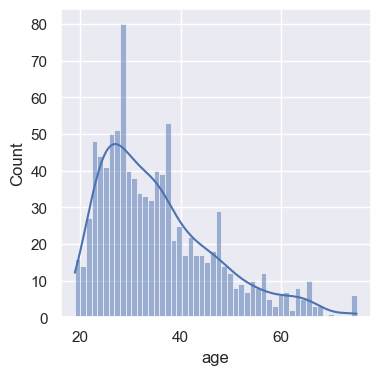

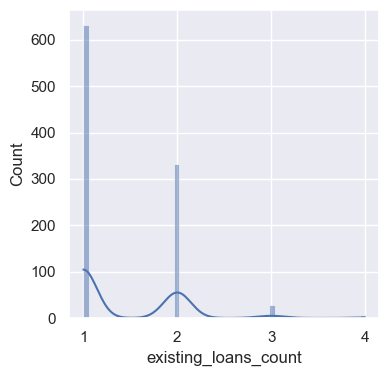

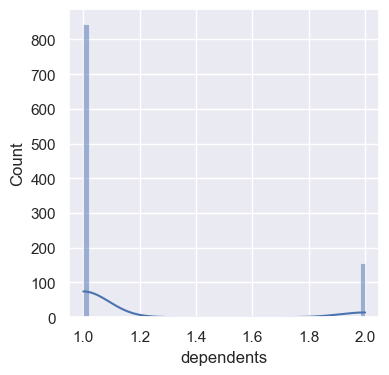

In [110]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        distribution(df,i)

#### For better understanding of outliers, Plotting boxplots

In [111]:
def boxplot(df,column):
    sns.boxplot(y=df[column])
    title = 'Box plot for '+str(column)
    plt.title(title)
    plt.xlabel(column)
    plt.show()

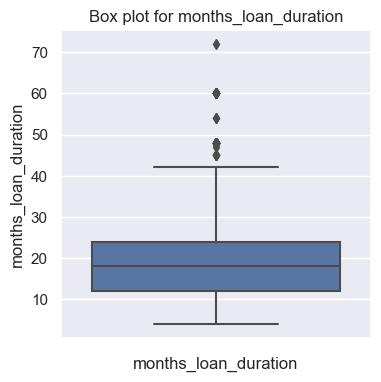

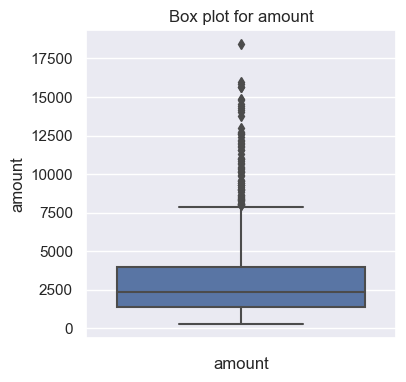

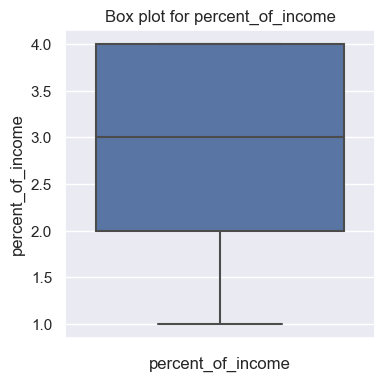

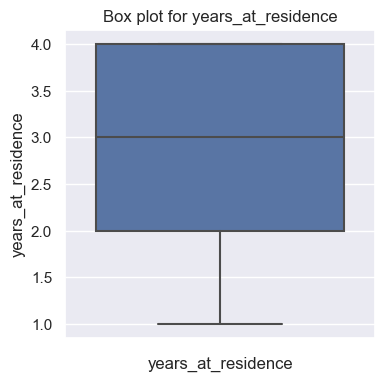

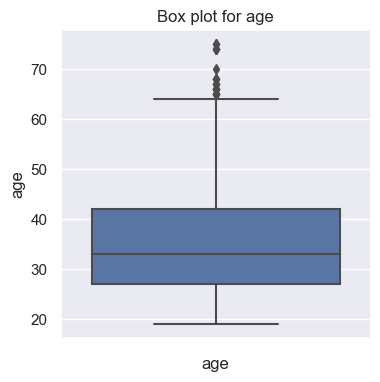

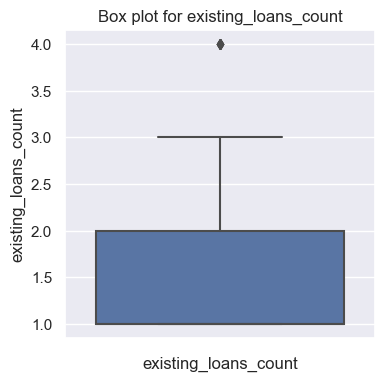

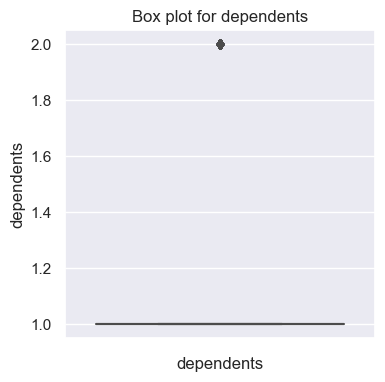

In [112]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        boxplot(df,i)

we can see, we are having multiple outliers in the various categories

### Custom Function to Remove Outliers

#### Identifying outliers

In [113]:
def outliers(data,z_thresold=3):
    outliers = []
    count = 0
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z = (i - mean)/std
        if abs(z) > 3:
            outliers.append(i)
            count+=1
    print('Number of outliers:', count)
    return sorted(outliers) 

In [114]:
for i in df.columns:
    if df[i].dtypes == 'int64':
        print('feature(',i,'):',outliers(df[i]),"\n")  

Number of outliers: 14
feature( months_loan_duration ): [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 72] 

Number of outliers: 25
feature( amount ): [11760, 11816, 11938, 11998, 12169, 12204, 12389, 12579, 12612, 12680, 12749, 12976, 13756, 14027, 14179, 14318, 14421, 14555, 14782, 14896, 15653, 15672, 15857, 15945, 18424] 

Number of outliers: 0
feature( percent_of_income ): [] 

Number of outliers: 0
feature( years_at_residence ): [] 

Number of outliers: 7
feature( age ): [70, 74, 74, 74, 74, 75, 75] 

Number of outliers: 6
feature( existing_loans_count ): [4, 4, 4, 4, 4, 4] 

Number of outliers: 0
feature( dependents ): [] 



Values of 4 in "existing_loans_count" can't be treat as outlier because values of 4 in the "existing_loans_count" feature are not due to data entry errors and they are consistent although their count is very low.

##### If we remove all the outliers then maximum data can be lost is:

In [115]:
TotalOutliers = 25+14+7+6
TotalOutliers

52

In [116]:
Percentage_lost = ((TotalOutliers)/len(df))*100
Percentage_lost

5.2

#### Removing Outliers

In [117]:
df = df[df['months_loan_duration']<60]
df = df[df['age']<70]

In [118]:
df['amount'] = np.where(df['amount']>=11760,np.mean(df['amount']),df['amount'])

In [119]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,20.395301,2948.722850,2.981614,2.837589,35.259448,1.409602,1.155260
std,11.148652,2208.741438,1.118568,1.102691,10.884977,0.578014,0.362338
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1359.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2284.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3654.000000,4.000000,4.000000,41.500000,2.000000,1.000000
max,54.000000,11590.000000,4.000000,4.000000,68.000000,4.000000,2.000000


### Bivariate Analysis

#### Analysing each Categorical Feature with target variable

In [120]:
def countplot(df,column):
    pd.crosstab(df[column],df['default']).plot(kind='bar')
    title = 'Purchase Frequency for '+str(column)+' Title'
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency of Purchase')
    plt.show()

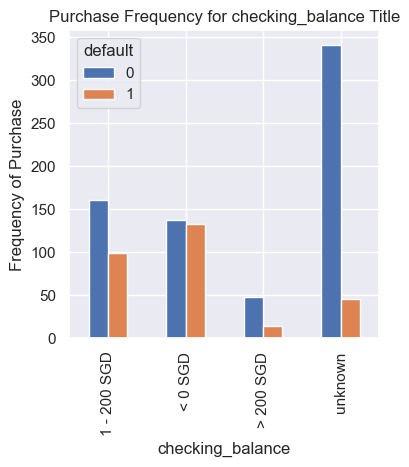

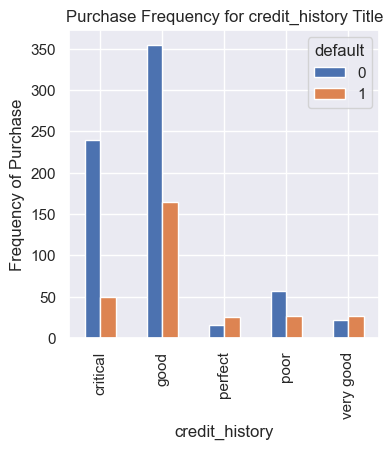

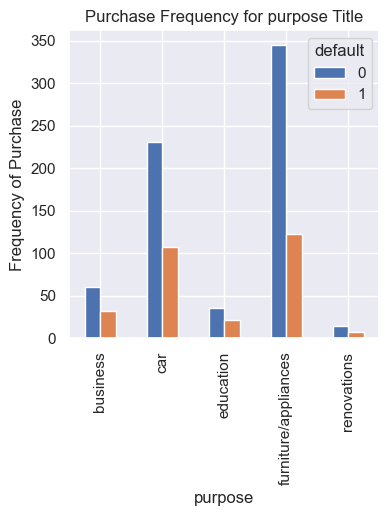

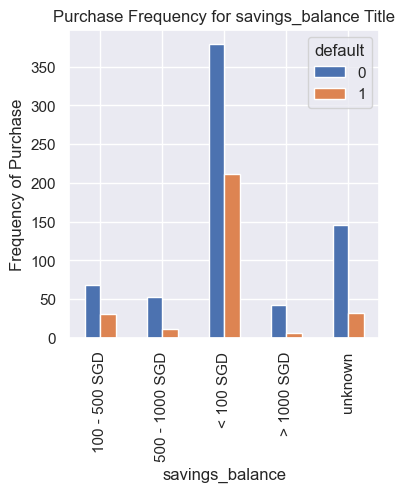

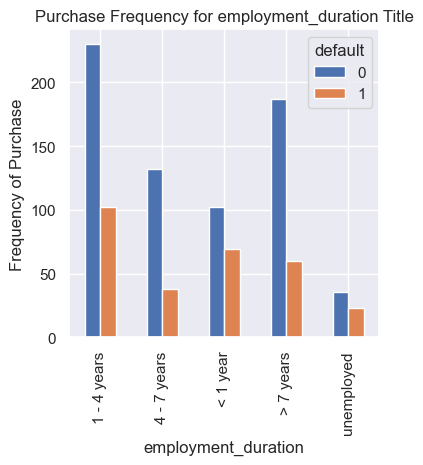

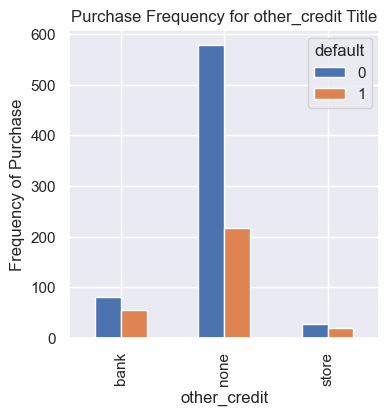

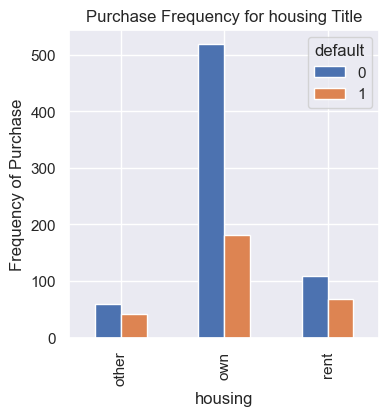

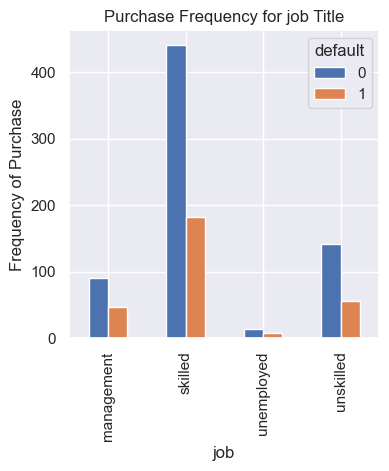

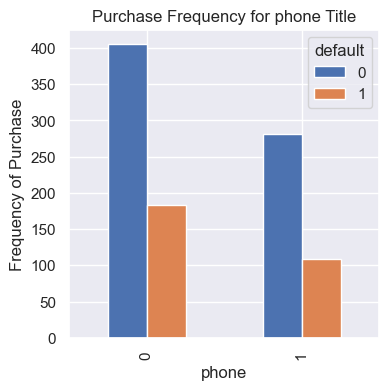

In [121]:
for i in df.columns:
    if df[i].dtypes == 'O' and i!='default':
        countplot(df,i)

We can see all features are having variations with target variable so all seems to be as important features

#### Checking Correlation

<Axes: >

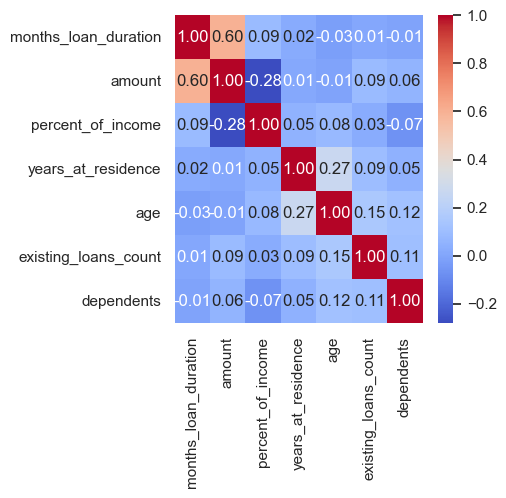

In [122]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt=".2f")

## Preparation of Data before Training the algorithm

### Creating Dummy Variable


In [123]:
catvars = [i for i in df.columns if df[i].dtype=='O'] 
catvars.remove('default')
df1 = df
for vars in catvars:
    dummy = pd.get_dummies(df[vars],prefix=vars,drop_first=True)
    df1 = pd.concat([df1,dummy],axis =1)

In [124]:
df.shape,df1.shape,len(catvars)

((979, 17), (979, 44), 9)

In [125]:
df1.sample(1)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_1
928,unknown,30,good,furniture/appliances,1867.0,unknown,> 7 years,4,4,58,none,own,1,skilled,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1


In [126]:
df1 = df1.drop(catvars,axis=1)
df1.shape

(979, 35)

In [127]:
df1 = df1.reset_index(drop=True)

In [128]:
df1.sample()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_1
850,12,652.0,4,4,24,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0


### Splitting Features and Target 

In [129]:
target = ['default']
target

['default']

In [130]:
features = list(df1.columns)
features.remove(target[0])
print(features,len(features))

['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'checking_balance_< 0 SGD', 'checking_balance_> 200 SGD', 'checking_balance_unknown', 'credit_history_good', 'credit_history_perfect', 'credit_history_poor', 'credit_history_very good', 'purpose_car', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'savings_balance_500 - 1000 SGD', 'savings_balance_< 100 SGD', 'savings_balance_> 1000 SGD', 'savings_balance_unknown', 'employment_duration_4 - 7 years', 'employment_duration_< 1 year', 'employment_duration_> 7 years', 'employment_duration_unemployed', 'other_credit_none', 'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled', 'job_unemployed', 'job_unskilled', 'phone_1'] 34


### Scaling features 

In [131]:
sc = StandardScaler()
sc_x = sc.fit_transform(df1[features])
sc_x = pd.DataFrame(sc_x)

In [132]:
sc_x.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
399,0.323496,0.129677,0.016446,-0.759975,-0.851098,-0.708999,-0.428715,-0.617105,-0.260023,1.236817,0.941446,-0.206394,-0.306357,-0.224564,-0.726155,-0.250948,1.044931,-0.15162,3.813094,-1.234178,-0.227063,-0.471405,-0.458406,-0.460037,1.7215,-0.25324,0.477866,-0.224564,0.629743,-0.471405,-1.322876,-0.148056,-0.503509,1.22631


### Multi-collinearity Check

In [133]:
variable = sc_x
data = {'VIF' : [variance_inflation_factor(variable, i ) for i in range(len(sc_x.columns))],
        'Features' : features}
     
vif = pd.DataFrame(data)

In [134]:
vif

,VIF,Features
0,1.926669,months_loan_duration
1,2.155094,amount
2,1.340937,percent_of_income
3,1.315015,years_at_residence
4,1.401453,age
5,1.643171,existing_loans_count
6,1.107522,dependents
7,1.641370,checking_balance_< 0 SGD
8,1.210433,checking_balance_> 200 SGD
9,1.656936,checking_balance_unknown


In [135]:
x = sc_x.values
y = df[target].values

In [136]:
x.shape,y.shape

((979, 34), (979, 1))

## MODEL BUILDING

### Logestic Regression 

In [137]:
def logreg(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Logestic Regression'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = LogisticRegression()
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [138]:
logreg(0.3)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.758
Accuracy of logistic regression classifier on test set: 0.776
Predicted    0   1  All
Actual                 
0          186  20  206
1           46  42   88
All        232  62  294
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       206
           1       0.68      0.48      0.56        88

    accuracy                           0.78       294
   macro avg       0.74      0.69      0.70       294
weighted avg       0.76      0.78      0.76       294

AUC Score 0.7874558693733451


#### Split Size 0.25

In [139]:
logreg(0.25)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.766
Accuracy of logistic regression classifier on test set: 0.771
Predicted    0   1  All
Actual                 
0          152  20  172
1           36  37   73
All        188  57  245
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       172
           1       0.65      0.51      0.57        73

    accuracy                           0.77       245
   macro avg       0.73      0.70      0.71       245
weighted avg       0.76      0.77      0.76       245

AUC Score 0.7716629499840714


#### Split Size 0.2

In [140]:
logreg(0.2)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.760
Accuracy of logistic regression classifier on test set: 0.781
Predicted    0   1  All
Actual                 
0          122  16  138
1           27  31   58
All        149  47  196
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       138
           1       0.66      0.53      0.59        58

    accuracy                           0.78       196
   macro avg       0.74      0.71      0.72       196
weighted avg       0.77      0.78      0.77       196

AUC Score 0.7903548225887056


### Decision Tree

In [141]:
def dtree(SplitSize,samples_split=2,samples_leaf=1,max_depth=None):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = DecisionTreeClassifier(min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth)
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [142]:
dtree(.3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 1.000
Accuracy of logistic regression classifier on test set: 0.690
Predicted    0   1  All
Actual                 
0          162  44  206
1           47  41   88
All        209  85  294
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       206
           1       0.48      0.47      0.47        88

    accuracy                           0.69       294
   macro avg       0.63      0.63      0.63       294
weighted avg       0.69      0.69      0.69       294

AUC Score 0.6261584289496911


So we see model is overfitted

In [143]:
dtree(.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.832
Accuracy of logistic regression classifier on test set: 0.752
Predicted    0   1  All
Actual                 
0          168  38  206
1           35  53   88
All        203  91  294
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       206
           1       0.58      0.60      0.59        88

    accuracy                           0.75       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.75      0.75      0.75       294

AUC Score 0.7558473080317741


In [144]:
dtree(.3,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.752
Accuracy of logistic regression classifier on test set: 0.738
Predicted    0   1  All
Actual                 
0          164  42  206
1           35  53   88
All        199  95  294
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       206
           1       0.56      0.60      0.58        88

    accuracy                           0.74       294
   macro avg       0.69      0.70      0.69       294
weighted avg       0.74      0.74      0.74       294

AUC Score 0.7545509708737864


#### Split Size 0.25

In [145]:
dtree(.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.835
Accuracy of logistic regression classifier on test set: 0.694
Predicted    0   1  All
Actual                 
0          142  30  172
1           45  28   73
All        187  58  245
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       172
           1       0.48      0.38      0.43        73

    accuracy                           0.69       245
   macro avg       0.62      0.60      0.61       245
weighted avg       0.68      0.69      0.68       245

AUC Score 0.6671312519910799


In [146]:
dtree(.25,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.752
Accuracy of logistic regression classifier on test set: 0.682
Predicted    0   1  All
Actual                 
0          149  23  172
1           55  18   73
All        204  41  245
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       172
           1       0.44      0.25      0.32        73

    accuracy                           0.68       245
   macro avg       0.58      0.56      0.55       245
weighted avg       0.64      0.68      0.65       245

AUC Score 0.727899012424339


#### Split Size 0.2

In [147]:
dtree(.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.849
Accuracy of logistic regression classifier on test set: 0.709
Predicted    0   1  All
Actual                 
0          109  29  138
1           28  30   58
All        137  59  196
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       138
           1       0.51      0.52      0.51        58

    accuracy                           0.71       196
   macro avg       0.65      0.65      0.65       196
weighted avg       0.71      0.71      0.71       196

AUC Score 0.7381934032983508


In [148]:
dtree(.2,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.759
Accuracy of logistic regression classifier on test set: 0.709
Predicted    0   1  All
Actual                 
0          105  33  138
1           24  34   58
All        129  67  196
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       138
           1       0.51      0.59      0.54        58

    accuracy                           0.71       196
   macro avg       0.66      0.67      0.67       196
weighted avg       0.72      0.71      0.71       196

AUC Score 0.7115192403798101


### Random Forest

In [149]:
def RF(SplitSize,n_estimators=1,samples_split=2,samples_leaf=1,max_depth=None,criterion='gini'):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth,criterion=criterion)
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [150]:
RF(0.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.762
Accuracy of logistic regression classifier on test set: 0.690
Predicted    0   1  All
Actual                 
0          180  26  206
1           65  23   88
All        245  49  294
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       206
           1       0.47      0.26      0.34        88

    accuracy                           0.69       294
   macro avg       0.60      0.57      0.57       294
weighted avg       0.66      0.69      0.66       294

AUC Score 0.6200353045013239


In [151]:
RF(0.3,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.780
Accuracy of logistic regression classifier on test set: 0.731
Predicted    0   1  All
Actual                 
0          203   3  206
1           76  12   88
All        279  15  294
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       206
           1       0.80      0.14      0.23        88

    accuracy                           0.73       294
   macro avg       0.76      0.56      0.54       294
weighted avg       0.75      0.73      0.66       294

AUC Score 0.7919240953221535


In [152]:
RF(0.3,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.740
Accuracy of logistic regression classifier on test set: 0.609
Predicted    0   1  All
Actual                 
0          148  58  206
1           57  31   88
All        205  89  294
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       206
           1       0.35      0.35      0.35        88

    accuracy                           0.61       294
   macro avg       0.54      0.54      0.54       294
weighted avg       0.61      0.61      0.61       294

AUC Score 0.6380736981465138


In [153]:
RF(0.3,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.774
Accuracy of logistic regression classifier on test set: 0.735
Predicted    0   1  All
Actual                 
0          202   4  206
1           74  14   88
All        276  18  294
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       206
           1       0.78      0.16      0.26        88

    accuracy                           0.73       294
   macro avg       0.75      0.57      0.55       294
weighted avg       0.75      0.73      0.67       294

AUC Score 0.7896624007060901


#### Split Size 0.25

In [154]:
RF(0.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.721
Accuracy of logistic regression classifier on test set: 0.641
Predicted    0   1  All
Actual                 
0          133  39  172
1           49  24   73
All        182  63  245
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       172
           1       0.38      0.33      0.35        73

    accuracy                           0.64       245
   macro avg       0.56      0.55      0.55       245
weighted avg       0.63      0.64      0.63       245

AUC Score 0.6683657215673782


In [155]:
RF(0.25,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.781
Accuracy of logistic regression classifier on test set: 0.731
Predicted    0   1  All
Actual                 
0          169   3  172
1           63  10   73
All        232  13  245
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       172
           1       0.77      0.14      0.23        73

    accuracy                           0.73       245
   macro avg       0.75      0.56      0.53       245
weighted avg       0.74      0.73      0.66       245

AUC Score 0.7822554953806945


In [156]:
RF(0.25,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.743
Accuracy of logistic regression classifier on test set: 0.686
Predicted    0   1  All
Actual                 
0          139  33  172
1           44  29   73
All        183  62  245
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       172
           1       0.47      0.40      0.43        73

    accuracy                           0.69       245
   macro avg       0.61      0.60      0.61       245
weighted avg       0.67      0.69      0.68       245

AUC Score 0.6776043325899969


In [157]:
RF(0.25,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.775
Accuracy of logistic regression classifier on test set: 0.735
Predicted    0   1  All
Actual                 
0          168   4  172
1           61  12   73
All        229  16  245
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       172
           1       0.75      0.16      0.27        73

    accuracy                           0.73       245
   macro avg       0.74      0.57      0.55       245
weighted avg       0.74      0.73      0.67       245

AUC Score 0.7751672507167887


#### Split Size 0.2

In [158]:
RF(0.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.761
Accuracy of logistic regression classifier on test set: 0.745
Predicted    0   1  All
Actual                 
0          124  14  138
1           36  22   58
All        160  36  196
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       138
           1       0.61      0.38      0.47        58

    accuracy                           0.74       196
   macro avg       0.69      0.64      0.65       196
weighted avg       0.73      0.74      0.72       196

AUC Score 0.7303848075962018


In [159]:
RF(0.2,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.785
Accuracy of logistic regression classifier on test set: 0.714
Predicted    0   1  All
Actual                 
0          132   6  138
1           50   8   58
All        182  14  196
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       138
           1       0.57      0.14      0.22        58

    accuracy                           0.71       196
   macro avg       0.65      0.55      0.52       196
weighted avg       0.68      0.71      0.65       196

AUC Score 0.7991004497751124


In [160]:
RF(0.2,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.775
Accuracy of logistic regression classifier on test set: 0.724
Predicted    0   1  All
Actual                 
0          117  21  138
1           33  25   58
All        150  46  196
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       138
           1       0.54      0.43      0.48        58

    accuracy                           0.72       196
   macro avg       0.66      0.64      0.65       196
weighted avg       0.71      0.72      0.71       196

AUC Score 0.7293853073463269


In [161]:
RF(0.2,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.780
Accuracy of logistic regression classifier on test set: 0.750
Predicted    0   1  All
Actual                 
0          133   5  138
1           44  14   58
All        177  19  196
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       138
           1       0.74      0.24      0.36        58

    accuracy                           0.75       196
   macro avg       0.74      0.60      0.60       196
weighted avg       0.75      0.75      0.70       196

AUC Score 0.7882308845577212


### XG Boost

#### Model Definition

In [162]:
def xgbst(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y.astype('int32'),test_size=SplitSize,random_state=10,stratify=y)
    model = 'XGB'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                                num_class=3, 
                                missing=1,
                                gamma=0, # default gamma value
                                learning_rate=0.1,
                                max_depth=5, # re-optimized from v2
                                reg_lambda=1, # default L2 value
                                #subsample=0.8, # tried but not ideal
                                #colsample_bytree=0.3, # tried but not ideal
                                early_stopping_rounds=10,
                                eval_metric=['merror','mlogloss'],
                                seed=42)
    xgb_clf.fit(xtrain, 
                ytrain,
                verbose=0, # set to 1 to see xgb training round intermediate results
                #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
                eval_set=[(xtrain, ytrain), (xtest, ytest)])

    # preparing evaluation metric plots
    results = xgb_clf.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # xgboost 'mlogloss' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    plt.ylabel('mlogloss')
    plt.title('GridSearchCV XGBoost mlogloss')
    plt.show()

    # xgboost 'merror' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('merror')
    plt.title('GridSearchCV XGBoost merror')
    plt.show()

    ypred = xgb_clf.predict(xtest)
    print('\n--------------- Classification Report ---------------\n')
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(xgb_clf.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(xgb_clf.score(xtest, ytest)))
    print(classification_report(ytest, ypred))

#### Split Size 0.3

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.3 ========================================


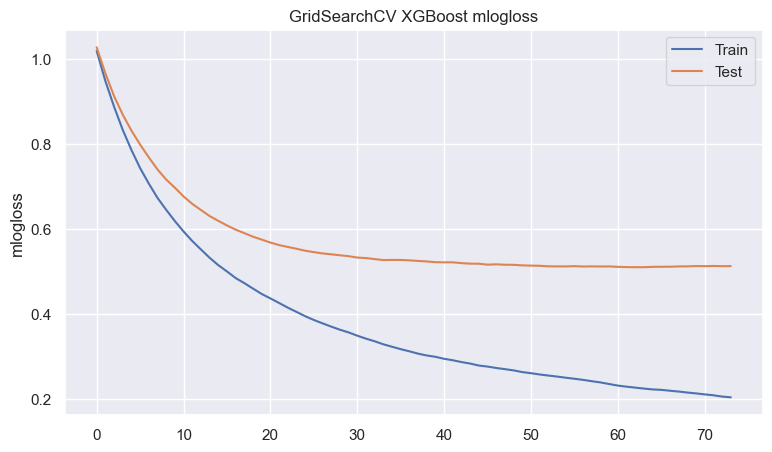

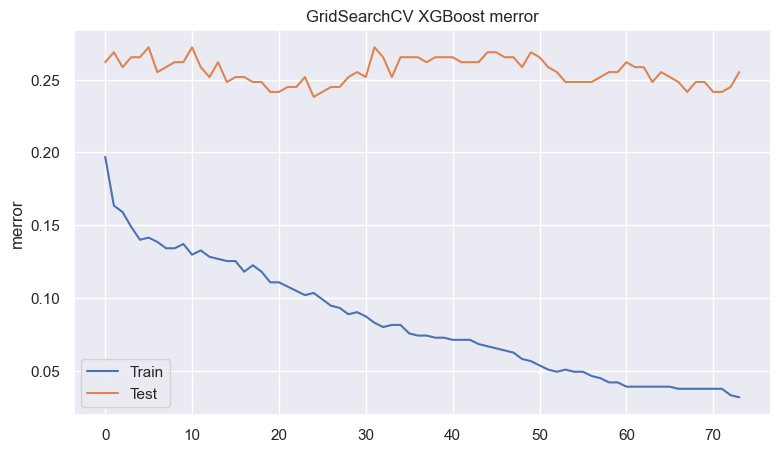


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.961
Accuracy of logistic regression classifier on test set: 0.752
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       206
           1       0.61      0.47      0.53        88

    accuracy                           0.75       294
   macro avg       0.70      0.67      0.68       294
weighted avg       0.74      0.75      0.74       294



In [163]:
xgbst(0.3)

#### Split Size 0.25

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.25 ========================================


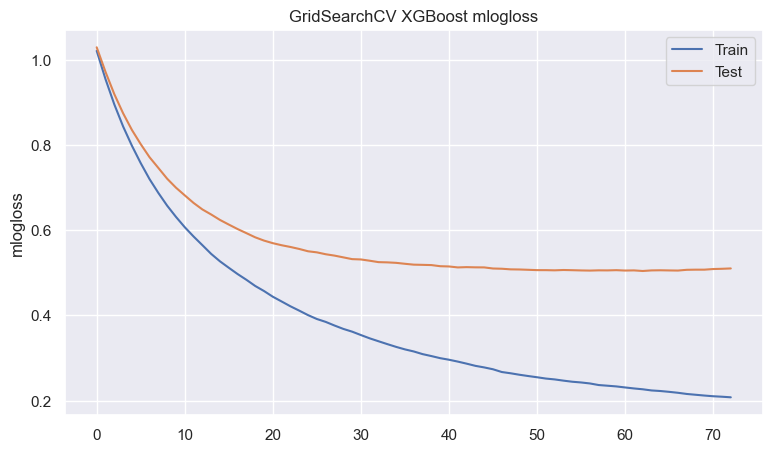

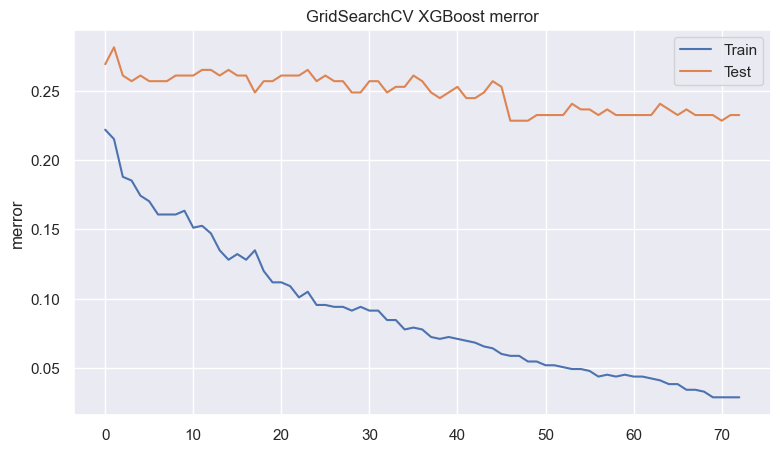


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.958
Accuracy of logistic regression classifier on test set: 0.767
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       172
           1       0.62      0.56      0.59        73

    accuracy                           0.77       245
   macro avg       0.72      0.71      0.71       245
weighted avg       0.76      0.77      0.76       245



In [164]:
xgbst(0.25)

#### Split Size 0.2

<IPython.core.display.Javascript object>

======================================== XGB with Split Size 0.2 ========================================


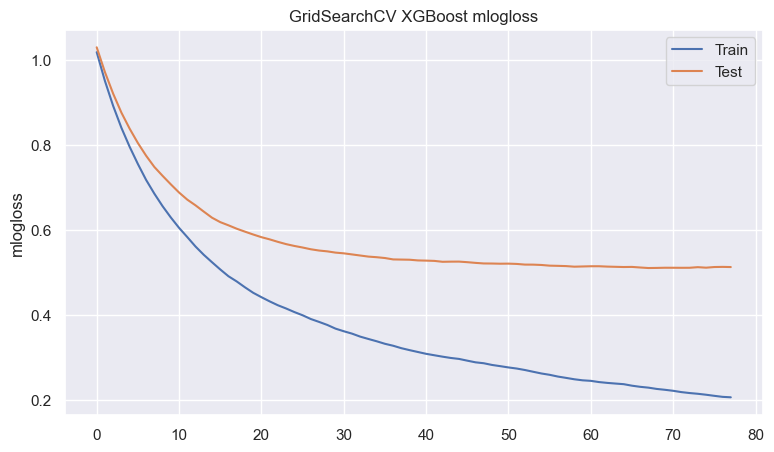

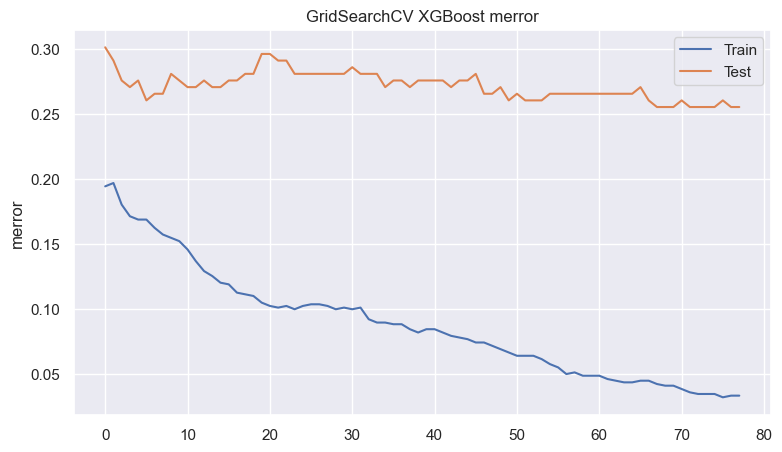


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.958
Accuracy of logistic regression classifier on test set: 0.745
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       138
           1       0.58      0.50      0.54        58

    accuracy                           0.74       196
   macro avg       0.69      0.67      0.68       196
weighted avg       0.74      0.74      0.74       196



In [165]:
xgbst(0.2)

## SMOTE to balance dataset

### Applying SMOTE algorithm to balance dataset

In [166]:
pd.DataFrame(y).value_counts()

0    687
1    292
dtype: int64

In [167]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(sc_x, y.astype('int32'))

In [168]:
pd.DataFrame(y_sm).value_counts()

0    687
1    687
dtype: int64

In [169]:
x_sm.shape,y_sm.shape

((1374, 34), (1374,))

In [170]:
y_sm = y_sm.reshape(-1,1)
y_sm.shape

(1374, 1)

In [171]:
x_sm = x_sm.values

In [172]:
x_sm,y_sm[:5]

(array([[-1.29187442, -0.80617517,  0.91090235, ..., -0.1480563 ,
         -0.50350881,  1.22631004],
        [ 2.47732252,  1.35996528, -0.8780112 , ..., -0.1480563 ,
         -0.50350881, -0.81545447],
        [-0.75341772, -0.38626463, -0.8780112 , ..., -0.1480563 ,
          1.98606255, -0.81545447],
        ...,
        [-0.75341772,  0.23443694,  0.91090235, ..., -0.1480563 ,
         -0.50350881, -0.50111824],
        [ 1.04981907,  0.10156391, -1.07360926, ..., -0.1480563 ,
         -0.50350881,  1.22631004],
        [ 2.03683611, -0.03274889,  0.91090235, ..., -0.1480563 ,
         -0.50350881, -0.81545447]]),
 array([[0],
        [1],
        [0],
        [0],
        [1]]))

In [173]:
x_sm.shape,y_sm.shape

((1374, 34), (1374, 1))

In [174]:
x.shape,y.shape

((979, 34), (979, 1))

### Logestic Regression 

In [175]:
def logreg(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm.astype('int64'),test_size=SplitSize,random_state=10)
    model = 'Logestic Regression'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = LogisticRegression()
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [176]:
logreg(0.3)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.748
Accuracy of logistic regression classifier on test set: 0.724
Predicted    0    1  All
Actual                  
0          135   60  195
1           54  164  218
All        189  224  413
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       195
           1       0.73      0.75      0.74       218

    accuracy                           0.72       413
   macro avg       0.72      0.72      0.72       413
weighted avg       0.72      0.72      0.72       413

AUC Score 0.7937661726652553


#### Split Size 0.25

In [177]:
logreg(0.25)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.744
Accuracy of logistic regression classifier on test set: 0.733
Predicted    0    1  All
Actual                  
0          109   52  161
1           40  143  183
All        149  195  344
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       161
           1       0.73      0.78      0.76       183

    accuracy                           0.73       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.73      0.73      0.73       344

AUC Score 0.8024980483996877


#### Split Size 0.2

In [178]:
logreg(0.2)

<IPython.core.display.Javascript object>

======================================== Logestic Regression with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.746
Accuracy of logistic regression classifier on test set: 0.735
Predicted    0    1  All
Actual                  
0           89   40  129
1           33  113  146
All        122  153  275
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       129
           1       0.74      0.77      0.76       146

    accuracy                           0.73       275
   macro avg       0.73      0.73      0.73       275
weighted avg       0.73      0.73      0.73       275

AUC Score 0.8040777317617075


### Decision Tree

In [179]:
def dtree(SplitSize,samples_split=2,samples_leaf=1,max_depth=None):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = DecisionTreeClassifier(min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth)
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [180]:
dtree(.3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 1.000
Accuracy of logistic regression classifier on test set: 0.738
Predicted    0    1  All
Actual                  
0          146   49  195
1           59  159  218
All        205  208  413
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       195
           1       0.76      0.73      0.75       218

    accuracy                           0.74       413
   macro avg       0.74      0.74      0.74       413
weighted avg       0.74      0.74      0.74       413

AUC Score 0.7390378734415431


So we see model is overfitted

In [181]:
dtree(.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.867
Accuracy of logistic regression classifier on test set: 0.734
Predicted    0    1  All
Actual                  
0          145   50  195
1           60  158  218
All        205  208  413
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       195
           1       0.76      0.72      0.74       218

    accuracy                           0.73       413
   macro avg       0.73      0.73      0.73       413
weighted avg       0.73      0.73      0.73       413

AUC Score 0.7959421312632322


In [182]:
dtree(.3,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.768
Accuracy of logistic regression classifier on test set: 0.719
Predicted    0    1  All
Actual                  
0          130   65  195
1           51  167  218
All        181  232  413
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       195
           1       0.72      0.77      0.74       218

    accuracy                           0.72       413
   macro avg       0.72      0.72      0.72       413
weighted avg       0.72      0.72      0.72       413

AUC Score 0.787649964714185


#### Split Size 0.25

In [183]:
dtree(.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.864
Accuracy of logistic regression classifier on test set: 0.724
Predicted    0    1  All
Actual                  
0          128   33  161
1           62  121  183
All        190  154  344
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       161
           1       0.79      0.66      0.72       183

    accuracy                           0.72       344
   macro avg       0.73      0.73      0.72       344
weighted avg       0.73      0.72      0.72       344

AUC Score 0.7975426806503072


In [184]:
dtree(.25,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.769
Accuracy of logistic regression classifier on test set: 0.709
Predicted    0    1  All
Actual                  
0          101   60  161
1           40  143  183
All        141  203  344
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       161
           1       0.70      0.78      0.74       183

    accuracy                           0.71       344
   macro avg       0.71      0.70      0.70       344
weighted avg       0.71      0.71      0.71       344

AUC Score 0.7935037165258121


#### Split Size 0.2

In [185]:
dtree(.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.869
Accuracy of logistic regression classifier on test set: 0.742
Predicted    0    1  All
Actual                  
0          107   22  129
1           49   97  146
All        156  119  275
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       129
           1       0.82      0.66      0.73       146

    accuracy                           0.74       275
   macro avg       0.75      0.75      0.74       275
weighted avg       0.75      0.74      0.74       275

AUC Score 0.813608367845386


In [186]:
dtree(.2,max_depth=4)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.761
Accuracy of logistic regression classifier on test set: 0.742
Predicted    0    1  All
Actual                  
0          100   29  129
1           42  104  146
All        142  133  275
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       129
           1       0.78      0.71      0.75       146

    accuracy                           0.74       275
   macro avg       0.74      0.74      0.74       275
weighted avg       0.75      0.74      0.74       275

AUC Score 0.8300148667303813


### Random Forest

In [187]:
def RF(SplitSize,n_estimators=1,samples_split=2,samples_leaf=1,max_depth=None,criterion='gini'):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'Decision Tree'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    model = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=samples_split,min_samples_leaf=samples_leaf,max_depth=max_depth,criterion=criterion)
    model.fit(xtrain, ytrain)
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(model.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(xtest, ytest)))
    ypred = model.predict(xtest)
    print(pd.crosstab(ytest.reshape(-1), ypred, rownames=['Actual'], colnames=['Predicted'], margins=True))
    print(classification_report(ytest, ypred))
    ypred_proba = model.predict_proba(xtest)
    print('AUC Score',roc_auc_score(ytest, ypred_proba[:,1]))

#### Split Size 0.3

In [188]:
RF(0.3,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.744
Accuracy of logistic regression classifier on test set: 0.663
Predicted    0    1  All
Actual                  
0          136   59  195
1           80  138  218
All        216  197  413
              precision    recall  f1-score   support

           0       0.63      0.70      0.66       195
           1       0.70      0.63      0.67       218

    accuracy                           0.66       413
   macro avg       0.67      0.67      0.66       413
weighted avg       0.67      0.66      0.66       413

AUC Score 0.7323100446953656


In [189]:
RF(0.3,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.850
Accuracy of logistic regression classifier on test set: 0.789
Predicted    0    1  All
Actual                  
0          148   47  195
1           40  178  218
All        188  225  413
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       195
           1       0.79      0.82      0.80       218

    accuracy                           0.79       413
   macro avg       0.79      0.79      0.79       413
weighted avg       0.79      0.79      0.79       413

AUC Score 0.8742178310985651


In [190]:
RF(0.3,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.772
Accuracy of logistic regression classifier on test set: 0.668
Predicted    0    1  All
Actual                  
0          141   54  195
1           83  135  218
All        224  189  413
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       195
           1       0.71      0.62      0.66       218

    accuracy                           0.67       413
   macro avg       0.67      0.67      0.67       413
weighted avg       0.67      0.67      0.67       413

AUC Score 0.7488002822865208


In [191]:
RF(0.3,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.3 ========================================
Accuracy of logistic regression classifier on train set: 0.848
Accuracy of logistic regression classifier on test set: 0.792
Predicted    0    1  All
Actual                  
0          147   48  195
1           38  180  218
All        185  228  413
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       195
           1       0.79      0.83      0.81       218

    accuracy                           0.79       413
   macro avg       0.79      0.79      0.79       413
weighted avg       0.79      0.79      0.79       413

AUC Score 0.8679134321336156


#### Split Size 0.25

In [192]:
RF(0.25,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.739
Accuracy of logistic regression classifier on test set: 0.654
Predicted    0    1  All
Actual                  
0          131   30  161
1           89   94  183
All        220  124  344
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       161
           1       0.76      0.51      0.61       183

    accuracy                           0.65       344
   macro avg       0.68      0.66      0.65       344
weighted avg       0.68      0.65      0.65       344

AUC Score 0.7400807792824899


In [193]:
RF(0.25,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.850
Accuracy of logistic regression classifier on test set: 0.776
Predicted    0    1  All
Actual                  
0          119   42  161
1           35  148  183
All        154  190  344
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       161
           1       0.78      0.81      0.79       183

    accuracy                           0.78       344
   macro avg       0.78      0.77      0.77       344
weighted avg       0.78      0.78      0.78       344

AUC Score 0.8755048705155619


In [194]:
RF(0.25,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.759
Accuracy of logistic regression classifier on test set: 0.738
Predicted    0    1  All
Actual                  
0          134   27  161
1           63  120  183
All        197  147  344
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       161
           1       0.82      0.66      0.73       183

    accuracy                           0.74       344
   macro avg       0.75      0.74      0.74       344
weighted avg       0.75      0.74      0.74       344

AUC Score 0.831822964396022


In [195]:
RF(0.25,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.25 ========================================
Accuracy of logistic regression classifier on train set: 0.845
Accuracy of logistic regression classifier on test set: 0.779
Predicted    0    1  All
Actual                  
0          118   43  161
1           33  150  183
All        151  193  344
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       161
           1       0.78      0.82      0.80       183

    accuracy                           0.78       344
   macro avg       0.78      0.78      0.78       344
weighted avg       0.78      0.78      0.78       344

AUC Score 0.8753691070155789


#### Split Size 0.2

In [196]:
RF(0.2,samples_split=20,samples_leaf=3)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.778
Accuracy of logistic regression classifier on test set: 0.702
Predicted    0    1  All
Actual                  
0           96   33  129
1           49   97  146
All        145  130  275
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       129
           1       0.75      0.66      0.70       146

    accuracy                           0.70       275
   macro avg       0.70      0.70      0.70       275
weighted avg       0.71      0.70      0.70       275

AUC Score 0.7883083784644791


In [197]:
RF(0.2,n_estimators=110,max_depth=5)

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.850
Accuracy of logistic regression classifier on test set: 0.785
Predicted    0    1  All
Actual                  
0           96   33  129
1           26  120  146
All        122  153  275
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       129
           1       0.78      0.82      0.80       146

    accuracy                           0.79       275
   macro avg       0.79      0.78      0.78       275
weighted avg       0.79      0.79      0.78       275

AUC Score 0.8889773813316343


In [198]:
RF(0.2,samples_split=20,samples_leaf=3,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.746
Accuracy of logistic regression classifier on test set: 0.644
Predicted    0    1  All
Actual                  
0           92   37  129
1           61   85  146
All        153  122  275
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       129
           1       0.70      0.58      0.63       146

    accuracy                           0.64       275
   macro avg       0.65      0.65      0.64       275
weighted avg       0.65      0.64      0.64       275

AUC Score 0.6982850164595944


In [199]:
RF(0.2,n_estimators=110,max_depth=5,criterion='entropy')

<IPython.core.display.Javascript object>

======================================== Decision Tree with Split Size 0.2 ========================================
Accuracy of logistic regression classifier on train set: 0.854
Accuracy of logistic regression classifier on test set: 0.796
Predicted    0    1  All
Actual                  
0           94   35  129
1           21  125  146
All        115  160  275
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       129
           1       0.78      0.86      0.82       146

    accuracy                           0.80       275
   macro avg       0.80      0.79      0.79       275
weighted avg       0.80      0.80      0.80       275

AUC Score 0.8894021450568121


### XG Boost

#### Model Definition

In [212]:
def xgbst(SplitSize):
    xtrain,xtest,ytrain,ytest = train_test_split(x_sm,y_sm,test_size=SplitSize,random_state=10)
    model = 'XGBoost'
    print('========================================',model,'with Split Size',SplitSize,'========================================')
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', 
                                num_class=3, 
                                missing=1,
                                gamma=0, # default gamma value
                                learning_rate=0.1,
                                max_depth=5, # re-optimized from v2
                                reg_lambda=1, # default L2 value
                                #subsample=0.8, # tried but not ideal
                                #colsample_bytree=0.3, # tried but not ideal
                                early_stopping_rounds=10,
                                eval_metric=['merror','mlogloss'],
                                seed=42)
    xgb_clf.fit(xtrain, 
                ytrain,
                verbose=0, # set to 1 to see xgb training round intermediate results
                #sample_weight=sample_weights, # class weights to combat unbalanced 'target'
                eval_set=[(xtrain, ytrain), (xtest, ytest)])

    # preparing evaluation metric plots
    results = xgb_clf.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # xgboost 'mlogloss' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.legend()
    plt.ylabel('mlogloss')
    plt.title('GridSearchCV XGBoost mlogloss')
    plt.show()

    # xgboost 'merror' plot
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('merror')
    plt.title('GridSearchCV XGBoost merror')
    plt.show()

    ypred = xgb_clf.predict(xtest)
    print('\n--------------- Classification Report ---------------\n')
    print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(xgb_clf.score(xtrain, ytrain)))
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(xgb_clf.score(xtest, ytest)))
    print(classification_report(ytest, ypred))
    
    return xgb_clf 

#### Split Size 0.3

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.3 ========================================


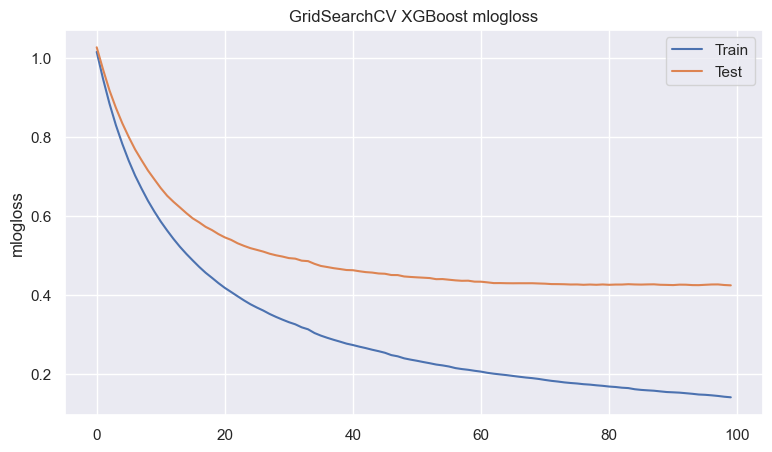

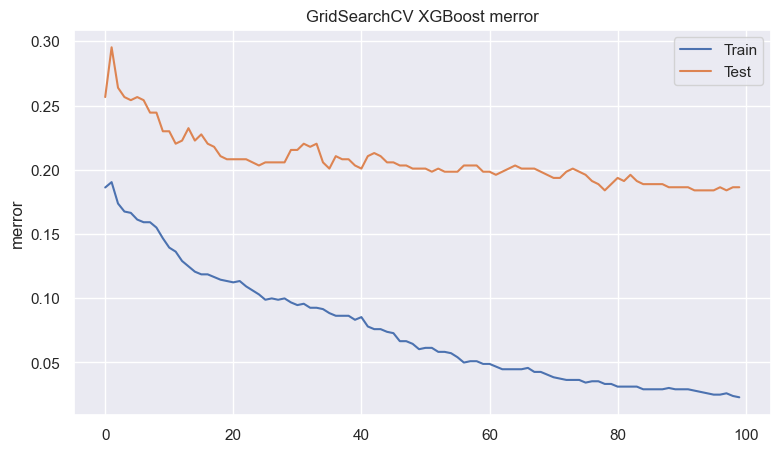


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.977
Accuracy of logistic regression classifier on test set: 0.814
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       195
           1       0.85      0.79      0.82       218

    accuracy                           0.81       413
   macro avg       0.81      0.82      0.81       413
weighted avg       0.82      0.81      0.81       413



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [213]:
xgbst(0.3)

#### Split Size 0.25

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.25 ========================================


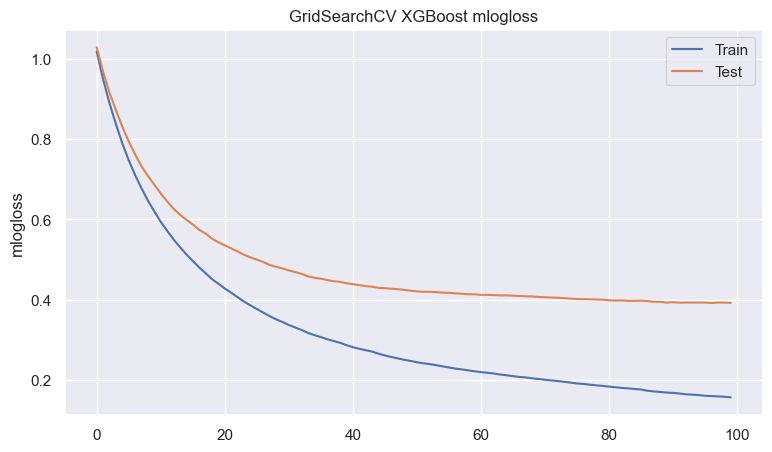

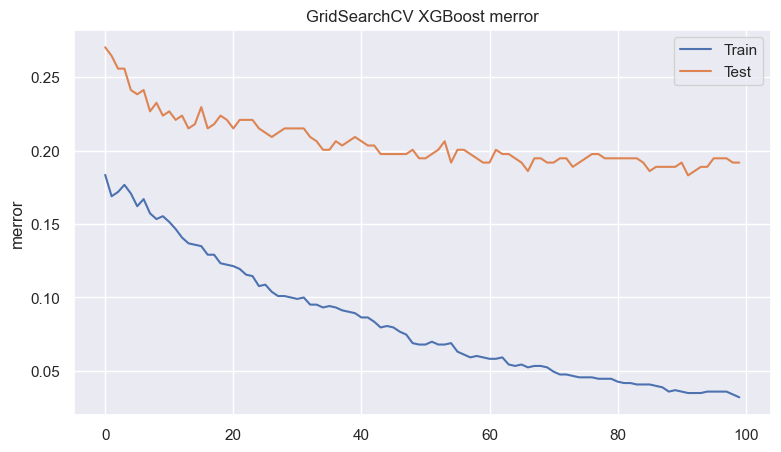


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.964
Accuracy of logistic regression classifier on test set: 0.805
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       161
           1       0.84      0.78      0.81       183

    accuracy                           0.81       344
   macro avg       0.81      0.81      0.81       344
weighted avg       0.81      0.81      0.81       344



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [214]:
xgbst(0.25)

#### Split Size 0.2

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.2 ========================================


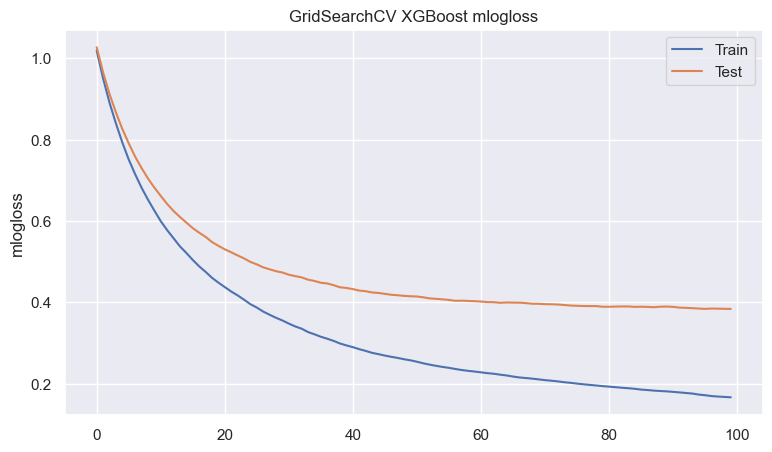

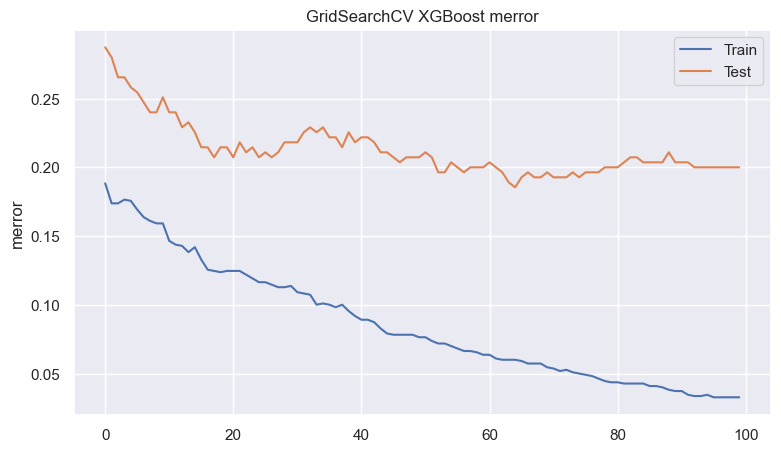


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.967
Accuracy of logistic regression classifier on test set: 0.800
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       129
           1       0.82      0.80      0.81       146

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['merror', 'mlogloss'],
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [215]:
xgbst(0.2)

## Saving Model

<IPython.core.display.Javascript object>

======================================== XGBoost with Split Size 0.2 ========================================


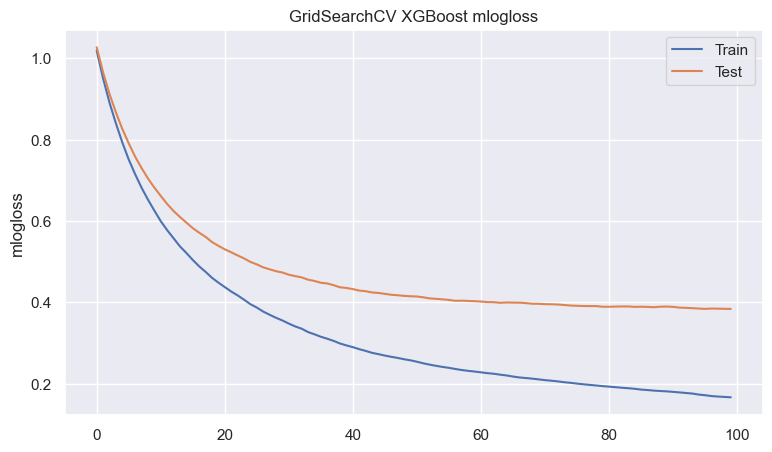

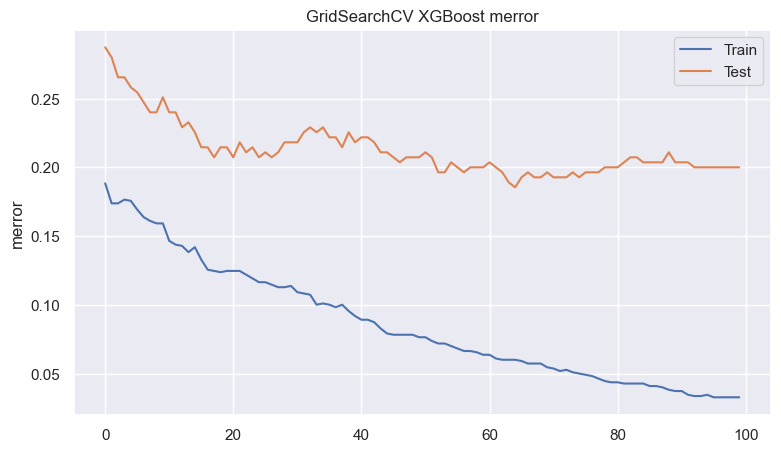


--------------- Classification Report ---------------

Accuracy of logistic regression classifier on train set: 0.967
Accuracy of logistic regression classifier on test set: 0.800
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       129
           1       0.82      0.80      0.81       146

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



In [216]:
model = xgbst(0.2)

In [217]:
type(model)

xgboost.sklearn.XGBClassifier

In [220]:
joblib.dump(model,'final_model.pkl')

['final_model.pkl']